#  #1: Implement three-way merge sort in Python that accepts lists of integers as input

For the first question, we will implement 3-way merge sort that use a list of integers in random order as a input and output a sorted list of integers in increasing order. 

The basic ideas of 3-way merge sort are the same as regular merge sort. The only difference is instead of dividing the list into 2 parts and call the recursion on each part, we will divide the list into 3 parts and call the recursion on each part. One more complication for the 3-way merge is how do we want to merge the 3 parts together. Two solutions come to mind: 

    1) We use the same merge function that used to merge 2 list. We can call the function on either the first separated list and the combination of the two other lists or the combination of the first two lists and the third. It does not matter because either way we will have the sentinel elements that are supposed to be greater than everything in 3 seperated lists at the end of each lists, therefore the procedure of comparision will go as usual without obstruction. 
    
    2) We can write another merge function specifically for 3-way merge. This function will employ the same idea as the regular merge function, but instead of creating the Left and Right "Decks", we create 3 decks and then consecutively compare 3 elements on top of each deck to find the smallest element to put into our "hand".
    
Intuitively, both method has the runtime of $\Theta(n)$: the first one call merge function twice, which has $\Theta(n)$ time, and total to $n$ elements; the second one run through all $n$ element at once, therefore has $\Theta(n)$ runtime. However, the second method perform worst in terms of memory as it has to store three seperated "decks" at the same time, while regular merge function only stores 2. Due to our prior discussion, we disregard the disadvantage about space and implememnt the new merge function for 3-way merge sort.  

In [2]:
#import related libraries
import math 
import random

def merge(List,start,mid1,mid2,end):  #3-way merge function: input a List, 1 starting, 2 middle, and 1 end point 
    Len1=mid1-start+1  #computing the length of the decks
    Len2=mid2-mid1
    Len3=end-mid2
    D1=[]  #creating the empty decks 
    D2=[] 
    D3=[]
    for _ in range(0,Len1):  #populate the decks  
        D1.append(List[start+_])
    for _ in range(0,Len2):    
        D2.append(List[mid1+_+1])
    for _ in range(0,Len3):    
        D3.append(List[mid2+_+1])    
    D1.append(math.inf)  #add sentinel cards
    D2.append(math.inf)
    D3.append(math.inf)               
    i=0   #initiate dummy counting variables for the decks
    j=0
    q=0               
    for k in range(start,end+1):  #comparing the elements in the decks sequentially to find the smallest->add to hand
        if D1[i]<=D2[j] and D1[i]<=D3[q]:
            List[k]=D1[i]
            i=i+1
        elif D2[j]<=D1[i] and D2[j]<=D3[q]: 
            List[k]=D2[j]
            j=j+1
        else:
            List[k]=D3[q]
            q=q+1       

def mergesort_3way(List,start,end): #mege sort 3-way, input the list, the start and end point
    if end>start: #the base case would be start=end, and then there's nothing to do
        plus=math.floor((end-start)/3) 
        mid1=start+plus #computing the middle points
        mid2=start+2*plus
        mergesort_3way(List,start,mid1) #calling the recursion for the three separated lists 
        mergesort_3way(List,mid1+1,mid2)  
        mergesort_3way(List,mid2+1,end)  
        merge(List,start,mid1,mid2,end) #merge the 3 lists with 3-war merge function
            
#Just to be sure, lets call insertion sort and sort the same list to know our 3-way merge sort works properly
def insertion(l): 
    for i in range(1,len(l)): 
        x=l[i] 
        j=i-1
        while j>=0 and l[j]>x: 
            l[j+1]=l[j]
            j=j-1
        l[j+1]=x

L_3way=[random.randint(-1998,1998) for _ in range(10)] #create a random test list, 1/25/1998 is actually my birthday
L_insert=[L_3way[_] for _ in range(len(L_3way))]                                        #using the same test list 
mergesort_3way(L_3way,0,len(L_3way)-1)
insertion(L_insert)

test=1 #initially test is True 
for i in range(len(L_3way)):
    if L_3way[i]!=L_insert[i]: 
        test=0  #compare each element of the sorted lists by each sort algorithm, if they are different then test=False
        
print(test)


1


Look likes our 3-way merge sort is a success. The recursion for this sort is:
$$T(n)=3T(n/3)+\Theta(n)$$
Using the recursion tree method to solve this, we can see that at the $i^{th}$ level of the tree the number of recursion called is $3^i$, and for each call the time require is $c\frac{n}{3^i}$, therefore at each level the total time is $cn$. The tree will have $log_{3}n +1$ level. Therefore, the runtime of the recursion is $\Theta(nlog_{3}n)$

Using the master theorem, we can see that the second situation applies: $\Theta(n)=\Theta(n^{log_{3}3})$. Therefore $T(n)=\Theta(nlogn)$. But since $log_{3}n<logn$ for n positive, the bound we found by recursion tree is asymptotically tighter. 

# #2: Implement a second version of three-way merge sort that calls insertion sort when sublists are below 3 elements

For the most part, the implementation of this hybrid will be the same as 3-way merge sort. Again, we will use the previous merge function. There are two notable difference for this hybrid, compared to the above 3-way merge sort: 

    - We now have a new base case: when the element of the list is fewer than 3, we call insertion sort to sort the list. So we need to have a conditional if-else statement where we specify that if the length of the list when calling the hybrid is equal or fewer than 3, we call insertion sort. 
    
    - Now we have to move the merge function call outside of the conditional if-else because we need to combine the list sorted by insertion sort to the lists seperated by merge sort. 

In [3]:
import math 
import random

def merge(List,start,mid1,mid2,end):  #this is the above 3-way merge function 
    Len1=mid1-start+1  
    Len2=mid2-mid1
    Len3=end-mid2
    D1=[]   
    D2=[] 
    D3=[]
    for _ in range(0,Len1):   
        D1.append(List[start+_])
    for _ in range(0,Len2):    
        D2.append(List[mid1+_+1])
    for _ in range(0,Len3):    
        D3.append(List[mid2+_+1])    
    D1.append(math.inf)  
    D2.append(math.inf)
    D3.append(math.inf)               
    i=0   
    j=0
    q=0               
    for k in range(start,end+1):
        if D1[i]<=D2[j] and D1[i]<=D3[q]:
            List[k]=D1[i]
            i=i+1
        elif D2[j]<=D1[i] and D2[j]<=D3[q]: 
            List[k]=D2[j]
            j=j+1
        else:
            List[k]=D3[q]
            q=q+1    
            
def insertion(l):  #same old insertion sort
    for i in range(1,len(l)): 
        x=l[i] 
        j=i-1
        while j>=0 and l[j]>x: 
            l[j+1]=l[j]
            j=j-1
        l[j+1]=x
        
def hybrid(List,start,end): #mege sort 3-way & insertion sort hybrid
    plus=math.floor((end-start)/3)
    mid1=start+plus 
    mid2=start+2*plus
    if end<=start+2: #the base case now would be the list has 3, 2 or 1 element(s), we will call insertion sort
        insertion(List)
    else: #else indicates end>start+2, which means the list has more than 3 elements, we use merge sort as usual 
        hybrid(List,start,mid1) 
        hybrid(List,mid1+1,mid2)  
        hybrid(List,mid2+1,end)  
    merge(List,start,mid1,mid2,end)  #moving the merge function call outside of the conditional structure

#Again, testing to see if the hybrid sort lists correctly by comparing it with insertion sort
L_hybrid=[random.randint(-1998,1998) for _ in range(251)]
L_insert=[L_hybrid[_] for _ in range(len(L_hybrid))]
hybrid(L_hybrid,0,len(L_hybrid)-1)
insertion(L_insert)

test=1 
for i in range(len(L_hybrid)):
    if L_hybrid[i]!=L_insert[i]: 
        test=0  
        
print(test)

1


Our hybrid seems to work correctly. We know that insertion sort has $O(n)=n^2$ and $\Omega(n)=n$ while 3-way merge sort has $\Theta(nlog_{3}n)$ so we know that for small $n$ insertion perform better than 3-way merge sort. Intuitively, then, we know that there is a optimal $k$ we should choose for the cut-off point we will call insertion. This $k$ varies for $n$. The bigger $n$ grows, the bigger $k$ becomes because as $n$ grows the intersection of $\Omega(n)=n$ and $\Theta(nlog_{3}n)$ entails bigger $k$. Generally speaking, this intersection will be our optimal $k$ for a specific $n$.

# #3: Analyze and compare the practical run times of regular merge sort, three-way merge sort, and the hybrid from above

If there are $n$ elements being sorted by the hybrid sort that has the cut-off point for insertion sort m, there will be $\frac{n}{m}$ such lists that will be sort by insertion sort. The running time of the insertion sort will be $$O_{insertion}(n)=\frac{n}{m}O(n)$$

At the last level $i^{th}$ (the level in which we call insertion sort), we also have: $$\frac{n}{3^i}=m$$

Because at this level the sublist, which has to have $\frac{n}{3^i}$ elements must have m elements to call insertion sort. Therefore we have: $$\frac{n}{m}=3^i$$

Or $$log_{3}\frac{n}{m}=i$$

So there will be $log_{3}\frac{n}{m}+1$ levels of the recursion tree, each will consume $O(n)$ time. Therefore the runtime for the recursion will be: $$O_{recursion}(n)=O(nlog_{3}(\frac{n}{m}))$$

Apply this for m=3 as above, we have: $$O_{insertion}(n)=\frac{n}{3}O(n)=nO(n)$$.

And: $$O_{recursion}(n)=O(nlog_{3}(\frac{n}{3})=O(nlog_{3}n))$$

Therefore the total runtime for the hybrid will be around: $$O_{hybrid}=nO(n)+O(nlog_{3}n)$$

As we mentioned, because the above hybrid choose m=3, which is relatively small, so the runtime for insertion sort will be approximately linear (because $3c$ and $9c$ is relatively similar if we have really big $n$). Therefore, the best case for the total runtime for the hybrid above with the cut-off point of m=3 is: $$O_{hybrid}=O(n)+O(nlog_{3}n)=O(nlog_{3}n)$$

And the worst case is: $$O_{hybrid}=O(n^2)+O(nlog_{3}n)=O(n^2)$$

Combine what we know, we have this table: 

\begin{array}{rr} \hline
 & RegularMerge &3wayMerge &Hybrid \\ \hline
Runtime (best) &nlogn &nlog_{3}n &nlog_{3}n \\ \hline
Runtime (worst) &nlogn &nlog_{3}n &n^2 \\ \hline
\end{array}

We will now use the timeit to plot the practical running time for each merge sort. 

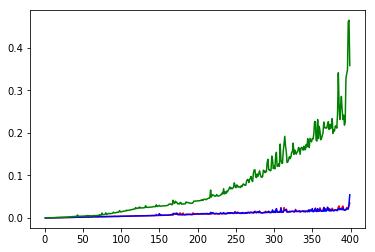

In [4]:
import math 
import random
import timeit
import matplotlib.pyplot as plt
    
def merge_regular(l,x,y,z): 
    n1=y-x+1
    n2=z-y
    L=[]
    R=[]
    for _ in range(0,n1):
        L.append(l[x+_])
    for _ in range(0,n2): 
        R.append(l[y+_+1])
    L.append(math.inf)
    R.append(math.inf)
    i=0
    j=0
    for k in range(x,z+1): 
        if L[i]<=R[j]:
            l[k]=L[i]
            i=i+1
        else: 
            l[k]=R[j]
            j=j+1
            
def merge(List,start,mid1,mid2,end):   
    Len1=mid1-start+1  
    Len2=mid2-mid1
    Len3=end-mid2
    D1=[]   
    D2=[] 
    D3=[]
    for _ in range(0,Len1):   
        D1.append(List[start+_])
    for _ in range(0,Len2):    
        D2.append(List[mid1+_+1])
    for _ in range(0,Len3):    
        D3.append(List[mid2+_+1])    
    D1.append(math.inf)  
    D2.append(math.inf)
    D3.append(math.inf)               
    i=0   
    j=0
    q=0               
    for k in range(start,end+1):
        if D1[i]<=D2[j] and D1[i]<=D3[q]:
            List[k]=D1[i]
            i=i+1
        elif D2[j]<=D1[i] and D2[j]<=D3[q]: 
            List[k]=D2[j]
            j=j+1
        else:
            List[k]=D3[q]
            q=q+1    
            
def insertion(l):  
    for i in range(1,len(l)): 
        x=l[i] 
        j=i-1
        while j>=0 and l[j]>x: 
            l[j+1]=l[j]
            j=j-1
        l[j+1]=x
            
def mergesort(l,x,z):                                  #regular mergesort 
    if x<z: 
        y=math.floor((x+z)/2)
        mergesort(l,x,y)
        mergesort(l,y+1,z)
        merge_regular(l,x,y,z)
        
def mergesort_3way(List,start,end):                    #3way mergesort 
    if end>start: 
        plus=math.floor((end-start)/3) 
        mid1=start+plus 
        mid2=start+2*plus
        mergesort_3way(List,start,mid1)  
        mergesort_3way(List,mid1+1,mid2)  
        mergesort_3way(List,mid2+1,end)  
        merge(List,start,mid1,mid2,end) 

def hybrid(List,start,end):                            #hybrid mergesort
    plus=math.floor((end-start)/3)
    mid1=start+plus 
    mid2=start+2*plus
    if end<=start+2: 
        insertion(List)
    else: 
        hybrid(List,start,mid1) 
        hybrid(List,mid1+1,mid2)  
        hybrid(List,mid2+1,end)  
    merge(List,start,mid1,mid2,end)  
    
    
def wrap(func, args1,args2,args3):      #the timeit module does not allow passing a function with arguments as input,
    def wrapped():                      #so we need to "wrap" it for the timeit module to work 
        return func(args1,args2,args3)
    return wrapped

t1=[]
t2=[]
t3=[]
x=[_ for _ in range(1,400)]
for i in range(1,400):
    l1=[random.randint(-500,500) for _ in range(i)]
    l2=[l1[_] for _ in range(len(l1))]
    l3=[l1[_] for _ in range(len(l1))]
    t1.append(timeit.timeit(wrap(mergesort,l1,0,len(l1)-1),number=10))
    t2.append(timeit.timeit(wrap(mergesort_3way,l2,0,len(l2)-1),number=10))
    t3.append(timeit.timeit(wrap(hybrid,l3,0,len(l3)-1),number=10))
    

plt.plot(x,t1,'red')
plt.plot(x,t2,'blue')
plt.plot(x,t3,'green')        
plt.show()

The timeit.timeit() function replicate the wrapped function 1 million times by default then average the running time. However, here due to time and resources constraints we specify the timeit.timeit() function to only average by 10 times, so we receive a fluctuated graph. Here, the regular merge sort (in red) perform nearly as well as 3-way mergesort (in blue). But, contradict to our hypothesis, the hybrid (in green) which suppose to perform a little better performed worst (by a huge margin). Maybe there is inherently some Python basic function that is called during the hybrid sort that consume a lot of time. Let's check this by using cProfiler, a module that counts the number of function call for Python. 

In [5]:
import cProfile

l1=[random.randint(-50000,50000) for i in range(20000)]
l2=[l1[_] for _ in range(len(l1))]
l3=[l1[_] for _ in range(len(l1))]
cProfile.run("mergesort(l1,0,len(l1)-1)")
cProfile.run("mergesort_3way(l2,0,len(l2)-1)")
cProfile.run("hybrid(l3,0,len(l3)-1)")

         407231 function calls (367233 primitive calls) in 0.285 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    19999    0.213    0.000    0.247    0.000 <ipython-input-4-58813d536453>:6(merge_regular)
  39999/1    0.034    0.000    0.285    0.285 <ipython-input-4-58813d536453>:66(mergesort)
        1    0.000    0.000    0.285    0.285 <string>:1(<module>)
        1    0.000    0.000    0.285    0.285 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
    19999    0.004    0.000    0.004    0.000 {built-in method math.floor}
   327230    0.034    0.000    0.034    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         309523 function calls (264763 primitive calls) in 0.248 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:line

As we can see, for a list of $n=20000$, regular merge sort made around 400,000 function calls, 3-way merge sort made around 300,000 function calls, which demonstrates our reasoning that 3-way merge sort is slightly better. The 3-way & insertion hybrid sort made around 300,000 calls (just slightly better than 3-way merge), which is better than regular merge sort. However, it took 49s for the hybrid to work, indicates that some of the function call took much more time than we expected. As we inspect the cProfiler output, we can see that on the second row, the call of insertion sort took around 49s. 

Therefore, we conclude that the hybrid will probably only perform better for a really, really large list, so the time require for insertion is smaller compared to the recursion calling time. 

# Optional Challenge: Implement k-way merge sort + Develop and run experiments to support a hypothesis about the “best” value of k 

I did not attempt to implement k-way merge sort, but I can hypothesize about the best value of $k$. For a k-way merge sort, the k-merge function will always perform at linear time $\Theta(n)$ because it will always perform a linear number of commands to compare sequentially the $n$ elements divided into k parts. Therefore, the running time of the recursion will be: $$T(n)=kT(\frac{n}{k})+\Theta(n)$$

Using the same analysis as the 3-way merge sort above, we can deduce that for k-way merge sort the runtime will be: $$T(n)=\Theta(nlog_{k}n)$$

Because $log_{k}n$ will decrease as k increases and n stays the same, the best k would be $k=n$, in which we divide the list into list of 1 element. Of course, this is the "best" one in terms of runtime, but not for memory. As for k-way merge function we have to save k seperated lists in the memory to compare them, so the bigger the k, the more memory we need. 







#### Sorry for the not-so-beautiful pdf. For some reason, pandoc cannot be installed on my Mac. Here's the link to either the html version or the .ipynb version (which is color-coded and easier to interpret): https://drive.google.com/file/d/1acv2UE8uIXbopmmReljaiJA7BFYp53Uk/view?usp=sharing 